# Arch

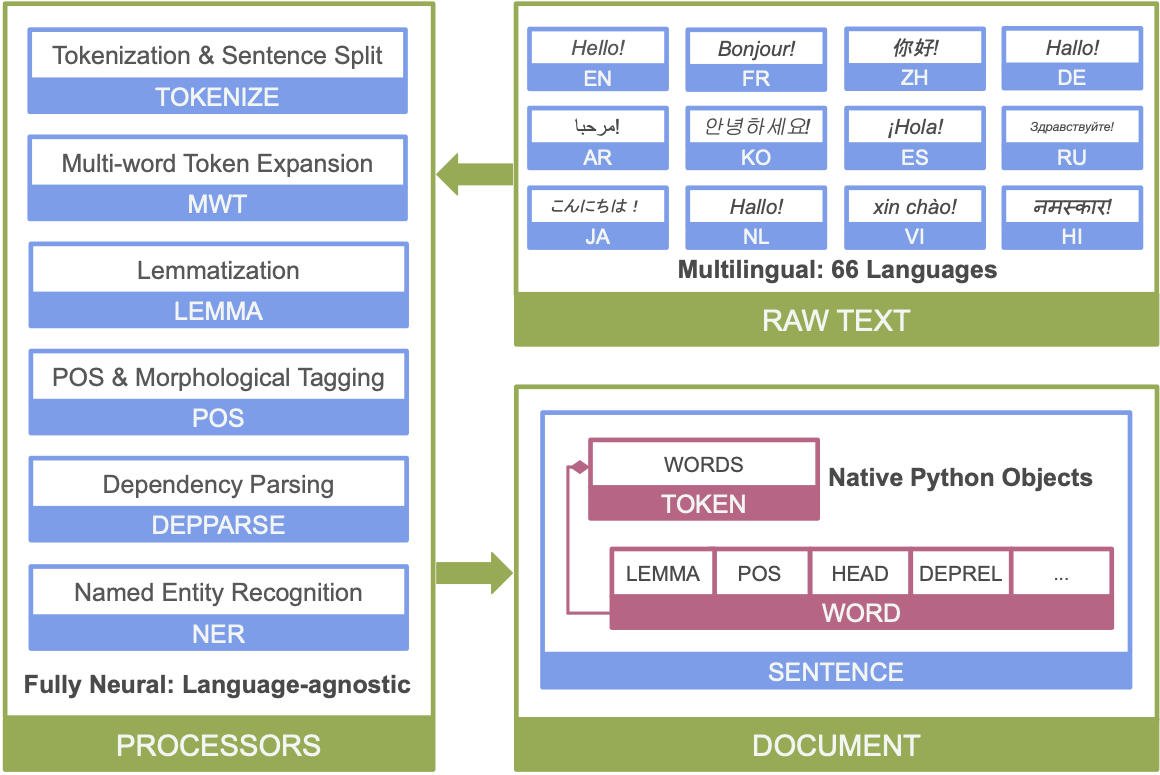

# Load

In [27]:
pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Imports

In [28]:
import stanza
from tabulate import tabulate

# Global functions

In [29]:
def print_word(doc):
    wordtext, wordlemma, wordpos = [[],[],[]]
    headers = ['word.text', 'word.lemma', 'word.pos'] 

    for sentence in doc.sentences:
        for word in sentence.words:
            wordtext.append(word.text)
            wordlemma.append(word.lemma)
            wordpos.append(word.pos)

    tbl = zip(wordtext, wordlemma, wordpos)

    return (tbl, headers)

# Define model language

In [23]:
stanza.download('en') # english model

2022-06-21 19:44:15 INFO: Downloading default packages for language: en (English)...
2022-06-21 19:44:17 INFO: File exists: /root/stanza_resources/en/default.zip
2022-06-21 19:44:25 INFO: Finished downloading models and saved to /root/stanza_resources.


# Using pipeline default

Stanza provides simple, flexible, and unified interfaces for downloading and running various NLP models. At a high level, to start annotating text, you need to first initialize a Pipeline, which pre-loads and chains up a series of Processors, with each processor performing a specific NLP task (e.g., tokenization, dependency parsing, or named entity recognition).

In [4]:
nlp = stanza.Pipeline('en') # init english neural pipeline

2022-06-21 16:37:21 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2022-06-21 16:37:21 INFO: Use device: cpu
2022-06-21 16:37:21 INFO: Loading: tokenize
2022-06-21 16:37:21 INFO: Loading: pos
2022-06-21 16:37:21 INFO: Loading: lemma
2022-06-21 16:37:22 INFO: Loading: depparse
2022-06-21 16:37:22 INFO: Loading: sentiment
2022-06-21 16:37:22 INFO: Loading: constituency
2022-06-21 16:37:23 INFO: Loading: ner
2022-06-21 16:37:24 INFO: Done loading processors!


## Using a document annotation

In [28]:
doc = nlp("Gabriel Castro was born in Brazil and study at University Unisinos.") # run annotation over a sentence

Within a `Document`, annotations are further stored in **Sentences, Tokens, Words** in a top-down fashion. An additional Span object may be used to store annotations such as named entity mentions. Here we provide some simple examples to manipulate the returned annotations.

A `Document` object holds the annotation of an entire document, and is automatically generated when a string is annotated by the **Pipeline**. It contains a collection of `Sentences` and entities (which are represented as Spans), and can be seamlessly translated into a native Python object.

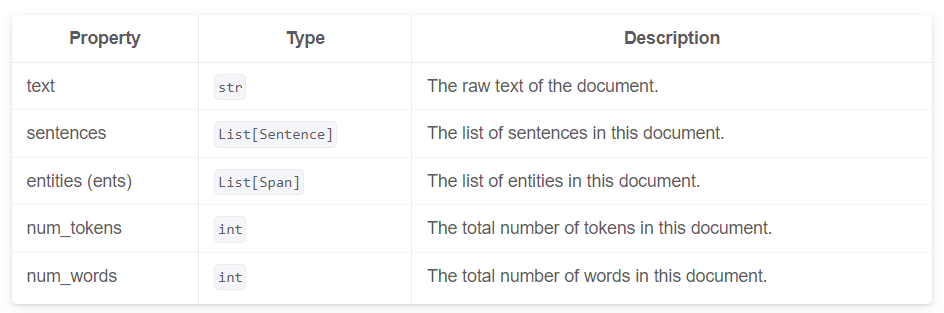

Access the named entities in each sentence of the document

In [30]:
print(*[f'entity: {ent.text}\ttype: {ent.type}' for ent in doc.ents], sep='\n')

entity: Gabriel Castro	type: PERSON
entity: Brazil	type: GPE
entity: University Unisinos	type: ORG


## Representation of NER for Tokens, using Inside–outside–beginning (tagging) - *BIOES*.

*The IOB format (short for inside, outside, beginning) is a common tagging format for tagging tokens in a chunking task*

- An O tag indicates that a token belongs to no chunk.

- Related tagging schemes sometimes include "START/END: This consists of the tags B, E, I, S or O where S is used to represent a chunk containing a single token. Chunks of length greater than or equal to two always start with the B tag and end with the E tag."

- Other Tagging Scheme's include BIOES/BILOU, where 'E' and 'L' denotes Last or Ending character is such a sequence and 'S' denotes Single element or 'U' Unit element.

In [31]:
print(*[f'token: {token.text}\tner: {token.ner}' for sent in doc.sentences for token in sent.tokens], sep='\n')

token: Gabriel	ner: B-PERSON
token: Castro	ner: E-PERSON
token: was	ner: O
token: born	ner: O
token: in	ner: O
token: Brazil	ner: S-GPE
token: and	ner: O
token: study	ner: O
token: at	ner: O
token: University	ner: B-ORG
token: Unisinos	ner: E-ORG
token: .	ner: O


# Using biomedical pipeline

In [30]:
# download and initialize a mimic pipeline with an i2b2 NER model
stanza.download('en', package='mimic', processors={'ner': 'i2b2'})

2022-06-21 23:31:49 INFO: Downloading these customized packages for language: en (English)...
| Processor       | Package |
-----------------------------
| tokenize        | mimic   |
| pos             | mimic   |
| lemma           | mimic   |
| depparse        | mimic   |
| ner             | i2b2    |
| backward_charlm | mimic   |
| pretrain        | mimic   |
| forward_charlm  | mimic   |

2022-06-21 23:31:49 INFO: File exists: /root/stanza_resources/en/tokenize/mimic.pt
2022-06-21 23:31:49 INFO: File exists: /root/stanza_resources/en/pos/mimic.pt
2022-06-21 23:31:49 INFO: File exists: /root/stanza_resources/en/lemma/mimic.pt
2022-06-21 23:31:49 INFO: File exists: /root/stanza_resources/en/depparse/mimic.pt
2022-06-21 23:31:49 INFO: File exists: /root/stanza_resources/en/ner/i2b2.pt
2022-06-21 23:31:49 INFO: File exists: /root/stanza_resources/en/backward_charlm/mimic.pt
2022-06-21 23:31:49 INFO: File exists: /root/stanza_resources/en/pretrain/mimic.pt
2022-06-21 23:31:49 INFO: File 

In [31]:
nlp = stanza.Pipeline('en', package='mimic', processors={'ner': 'i2b2'})

2022-06-21 23:31:54 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | mimic   |
| pos       | mimic   |
| lemma     | mimic   |
| depparse  | mimic   |
| ner       | i2b2    |

2022-06-21 23:31:54 INFO: Use device: gpu
2022-06-21 23:31:54 INFO: Loading: tokenize
2022-06-21 23:31:54 INFO: Loading: pos
2022-06-21 23:31:54 INFO: Loading: lemma
2022-06-21 23:31:54 INFO: Loading: depparse
2022-06-21 23:31:54 INFO: Loading: ner
2022-06-21 23:31:55 INFO: Done loading processors!


In [15]:
doc = nlp('A single-cell transcriptomic atlas characterizes ageing tissues in the mouse.')
# print out dependency tree
doc.sentences[0].print_dependencies()

('A', 6, 'det')
('single', 4, 'amod')
('-', 4, 'punct')
('cell', 6, 'compound')
('transcriptomic', 6, 'amod')
('atlas', 7, 'nsubj')
('characterizes', 0, 'root')
('ageing', 9, 'compound')
('tissues', 7, 'obj')
('in', 12, 'case')
('the', 12, 'det')
('mouse', 7, 'obl')
('.', 7, 'punct')


In [16]:
print(*[f'entity: {ent.text}\ttype: {ent.type}' for ent in doc.ents], sep='\n')

entity: A single-cell transcriptomic atlas	type: TREATMENT


In [20]:
tbl, headers = print_word(doc)
print(tabulate(tbl, headers=headers, floatfmt=".4f"))

word.text       word.lemma      word.pos
--------------  --------------  ----------
A               a               DET
single          single          ADJ
-               -               PUNCT
cell            cell            NOUN
transcriptomic  transcriptomic  ADJ
atlas           atla            NOUN
characterizes   characterize    VERB
ageing          ageing          NOUN
tissues         tissue          NOUN
in              in              ADP
the             the             DET
mouse           mouse           NOUN
.               .               PUNCT


In [32]:
mimic_context = []

mimic_context.append('Probable sinus tachycardia')
mimic_context.append('Left axis deviation')
mimic_context.append('Left bundle branch block')
mimic_context.append('Since previous tracing, no significant change except for increased heart rate')
mimic_context.append('respiratory-> pt remains intubated and vented on psv8/peep5 and o2 35%. srr 20''s w/tv ~700-800cc. most current abg on above settings: 7.41/35/121/23/-1. pt continues to require frequent suctioning for thick, white secretions. plan for trach in the or sometime later today.')
mimic_context.append('cardiac-> pt is hemodynamically stable. he did receive a single dose of iv hydralazine for a sbp >160 earlier in the shift w/good results. sbp ranging 150-160''s, but he was bolused several times for sbp >180 during his am bath as well. hr 90-100''s, sr/st with no noted ectopy.')
mimic_context.append('MEDICAL CONDITION: 57F s/p donor R hepatic lobectomy, with known bile leak & now w fevers, s/p PTC')
mimic_context.append('PROCEDURE: CT of the abdomen and pelvis with contrast.')
mimic_context.append('INDICATION: Fevers.  Status post right hepatic lobectomy and percutaneous transhepatic catheter placement.')

In [33]:
for mimic in mimic_context:
    doc = nlp(mimic)
    print('*****\n')
    print(*[f'> entity: {ent.text}\ttype: {ent.type}' for ent in doc.ents], sep='\n')
    print('*****\n')

*****

> entity: sinus tachycardia	type: PROBLEM
*****

*****

> entity: Left axis deviation	type: PROBLEM
*****

*****

> entity: Left bundle branch block	type: PROBLEM
*****

*****

> entity: previous tracing	type: TEST
> entity: significant change	type: PROBLEM
> entity: increased heart rate	type: PROBLEM
*****

*****

> entity: intubated	type: TREATMENT
> entity: vented	type: TREATMENT
> entity: psv8	type: TREATMENT
> entity: peep5	type: TREATMENT
> entity: o2	type: TREATMENT
> entity: abg	type: TEST
> entity: frequent suctioning	type: TREATMENT
> entity: thick, white secretions	type: PROBLEM
> entity: trach	type: TREATMENT
*****

*****

> entity: iv hydralazine	type: TREATMENT
> entity: a sbp	type: TEST
> entity: sbp	type: TEST
> entity: sbp	type: TEST
> entity: his am bath	type: TREATMENT
> entity: hr	type: TEST
> entity: noted ectopy	type: PROBLEM
*****

*****

> entity: donor R hepatic lobectomy	type: TREATMENT
> entity: known bile leak	type: PROBLEM
> entity: fevers	type: PROB

In [26]:
for mimic in mimic_context:
    doc = nlp(mimic)
    print('*****\n')
    print(*[f'> token: {token.text}\tner: {token.ner}' for sent in doc.sentences for token in sent.tokens], sep='\n')
    print('*****\n')

*****

> token: Probable	ner: O
> token: sinus	ner: B-PROBLEM
> token: tachycardia	ner: E-PROBLEM
*****

*****

> token: Left	ner: B-PROBLEM
> token: axis	ner: I-PROBLEM
> token: deviation	ner: E-PROBLEM
*****

*****

> token: Left	ner: B-PROBLEM
> token: bundle	ner: I-PROBLEM
> token: branch	ner: I-PROBLEM
> token: block	ner: E-PROBLEM
*****

*****

> token: Since	ner: O
> token: previous	ner: B-TEST
> token: tracing	ner: E-TEST
> token: ,	ner: O
> token: no	ner: O
> token: significant	ner: B-PROBLEM
> token: change	ner: E-PROBLEM
> token: except	ner: O
> token: for	ner: O
> token: increased	ner: B-PROBLEM
> token: heart	ner: I-PROBLEM
> token: rate	ner: E-PROBLEM
*****

*****

> token: respiratory	ner: O
> token: ->	ner: O
> token: pt	ner: O
> token: remains	ner: O
> token: intubated	ner: S-TREATMENT
> token: and	ner: O
> token: vented	ner: S-TREATMENT
> token: on	ner: O
> token: psv8	ner: S-TREATMENT
> token: /	ner: O
> token: peep5	ner: S-TREATMENT
> token: and	ner: O
> token: o2	n

In [35]:
doc = nlp(mimic_context[4])

tbl, headers = print_word(doc)
print(tabulate(tbl, headers=headers, floatfmt=".4f"))

word.text          word.lemma         word.pos
-----------------  -----------------  ----------
respiratory        respiratory        ADJ
->                 ->                 PUNCT
pt                 pt                 NOUN
remains            remain             VERB
intubated          intubate           VERB
and                and                CCONJ
vented             vent               VERB
on                 on                 ADP
psv8               psv8               NOUN
/                  /                  PUNCT
peep5              peep5              NOUN
and                and                CCONJ
o2                 o2                 NOUN
35                 35                 NUM
%.                 %.                 PUNCT
srr                srr                NOUN
20s                20                 NOUN
w/tv               w/tv               NOUN
~700-800cc.        ~700-800cc.        NUM
most               most               ADV
current            current            ADJ
ab